In [1]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the dataset
df= pd.read_csv(r"D:\RATHNA\PYTHON\Kaggle\card_transdata.csv")

In [3]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
# Features and target variable
X = df.drop('fraud', axis=1)  
y = df['fraud']

In [5]:
# Splitting the Dataset
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
#Initalize and train the random forest classifier 
rf_classifier = RandomForestClassifier(n_estimators=2, random_state=42)
rf_classifier.fit(X_train, y_train)



RandomForestClassifier(n_estimators=2, random_state=42)

In [7]:
#predict and evaluate
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy:1.00
Confusion Matrix:
 [[273867      4]
 [    61  26068]]


In [8]:
classifier = RandomForestClassifier(criterion='gini', max_depth=4, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [9]:
# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.99
Confusion Matrix:
[[273862      9]
 [  2481  23648]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    273871
         1.0       1.00      0.91      0.95     26129

    accuracy                           0.99    300000
   macro avg       1.00      0.95      0.97    300000
weighted avg       0.99      0.99      0.99    300000



In [10]:

classifier = RandomForestClassifier(criterion='entropy', max_depth=4, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, random_state=42)

In [11]:
# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.99
Confusion Matrix:
[[273871      0]
 [  2939  23190]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    273871
         1.0       1.00      0.89      0.94     26129

    accuracy                           0.99    300000
   macro avg       0.99      0.94      0.97    300000
weighted avg       0.99      0.99      0.99    300000



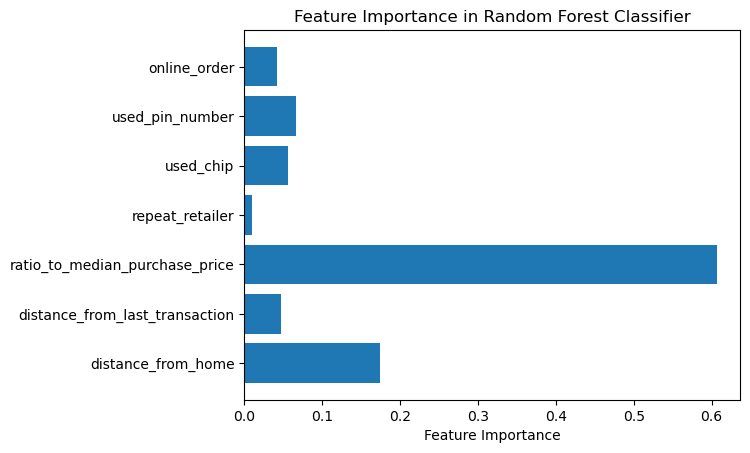

In [12]:
# Feature importance for the classifier
import matplotlib.pyplot as plt

feature_importances = rf_classifier.feature_importances_
features = X.columns
plt.barh(features, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest Classifier")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV with Random Forest Classifier
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)